In [1]:
# Import required libraries.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

+ $\textbf{Testing With Command:}$ ```python lebwohl_lasher_s_cython.py 500 50 0.5 0```

$\textbf{1. Ensure Correct Plots Are Produced}$

In [2]:
def plot_data(data):
    """
    Plots energy and order parameter against Monte Carlo step.

    Parameters
    ----------
    data : pd.DataFrame
        The data from the Lebwohl-Lasher simulation.
    """

    # Plot energy and order parameter against Monte Carlo step.
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    ax[0].plot(data.index, data["Energy"])
    ax[1].plot(data.index, data["Order"])

    ax[0].set_title("Reduced Temperature = 0.5")
    ax[0].set_xlabel("Monte Carlo Step")
    ax[0].set_ylabel("Reduced Energy")

    ax[1].set_title("Reduced Temperature = 0.5")
    ax[1].set_xlabel("Monte Carlo Step")
    ax[1].set_ylabel("Order Parameter")

    fig.tight_layout()
    plt.show()

$\textbf{1.1 Base Version}$

+ ```lebwohl_lasher_s_cython.py Version: Commit - 056be5e74a2735b1e6d6625e11b9deed38f00b10```

In [3]:
# Read in the output data.
data_001 = pd.DataFrame(np.loadtxt("output_logs/output_normal_056be5e74a2735b1e6d6625e11b9deed38f00b10.txt", 
                                   dtype=np.float64, skiprows=9), columns=["MCS", "Ratio", "Energy", "Order"]).set_index("MCS")

print(data_001.head().to_markdown())

|   MCS |   Ratio |   Energy |   Order |
|------:|--------:|---------:|--------:|
|     0 |  0.5    | -2467.7  |  0.261  |
|     1 |  0.6832 | -3677.58 |  0.2562 |
|     2 |  0.6192 | -4412.91 |  0.2588 |
|     3 |  0.6056 | -4953.69 |  0.2583 |
|     4 |  0.5664 | -5407.14 |  0.2553 |


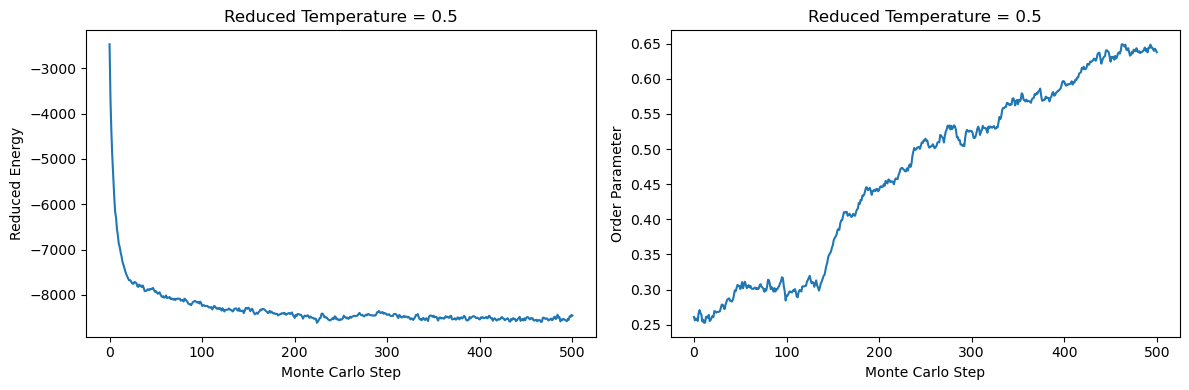

In [4]:
# Plot the data.
plot_data(data_001)

$\textbf{2. Check Output Values Are Consistent}$

+ $\text{Test if the output logs across versions of the code are the same.}$
+ $\text{This is done through performing a simulation where the random seed is to 42.}$

- ```-> np.random.seed(42)```

$\textbf{2.1 Base Version}$

+ ```lebwohl_lasher_s_cython.py Version: Commit - 056be5e74a2735b1e6d6625e11b9deed38f00b10```

In [5]:
# Read in the data.
data_compare_001 = pd.DataFrame(np.loadtxt("output_logs/output_seed_42_056be5e74a2735b1e6d6625e11b9deed38f00b10.txt", 
                                             dtype=np.float64, skiprows=9), columns=["MCS", "Ratio", "Energy", "Order"]).set_index("MCS")

print(data_compare_001.head().to_markdown())

|   MCS |   Ratio |   Energy |   Order |
|------:|--------:|---------:|--------:|
|     0 |  0.5    | -2566.27 |  0.2711 |
|     1 |  0.6784 | -3780.83 |  0.2597 |
|     2 |  0.6064 | -4589.14 |  0.2604 |
|     3 |  0.5872 | -5126.1  |  0.2625 |
|     4 |  0.5668 | -5571.93 |  0.2654 |


$\textbf{3. Time Specific Functions}$

In [6]:
# Import the script.
import lebwohl_lasher_s_cython

In [7]:
# Generate a lattice.
lattice_length = 50
lattice = lebwohl_lasher_s_cython.init_lattice(lattice_length)

# Generate two lattice positions to time the "cell_energy" function.
x_pos, y_pos = np.random.randint(0, high=lattice_length, size=2)

$\textbf{3.1 Base Version}$

+ ```lebwohl_lasher_s_cython.py Version: Commit - 056be5e74a2735b1e6d6625e11b9deed38f00b10```

In [8]:
# Time the "cell_energy" function.
%timeit lebwohl_lasher_s_cython.cell_energy(lattice, lattice_length, x_pos, y_pos)

7.33 μs ± 514 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [9]:
# Time the "total_energy" function.
%timeit lebwohl_lasher_s_cython.total_energy(lattice, lattice_length)

17.2 ms ± 964 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [10]:
# Time the "calculate_order" function.
%timeit lebwohl_lasher_s_cython.calculate_order(lattice, lattice_length)

17.7 ms ± 1.33 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [11]:
# Time the "monte_carlo_step" function.
%timeit lebwohl_lasher_s_cython.monte_carlo_step(lattice, lattice_length, temperature=0.5)

54.8 ms ± 6.43 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
